# SVM for Walkscore

In [81]:
import pandas as pd 
import numpy as np
import pylab as pl

from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

import scipy.stats as stats
import math
import warnings
import os

%pylab inline
warnings.filterwarnings("ignore")

pl.style.use('fivethirtyeight')
pl.rcParams['figure.figsize'] = (16,16)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('../data/df_walkscore.pkl')


## Data Exploration

In [11]:
data['walkscore'].describe()

count    30100.000000
mean        91.719734
std          7.617988
min         41.000000
25%         87.000000
50%         95.000000
75%         97.000000
max        100.000000
Name: walkscore, dtype: float64

In [25]:
sorted_walkscore = sorted(data['walkscore'])
fit = stats.norm.pdf(sorted_walkscore, np.mean(sorted_walkscore), np.std(sorted_walkscore))

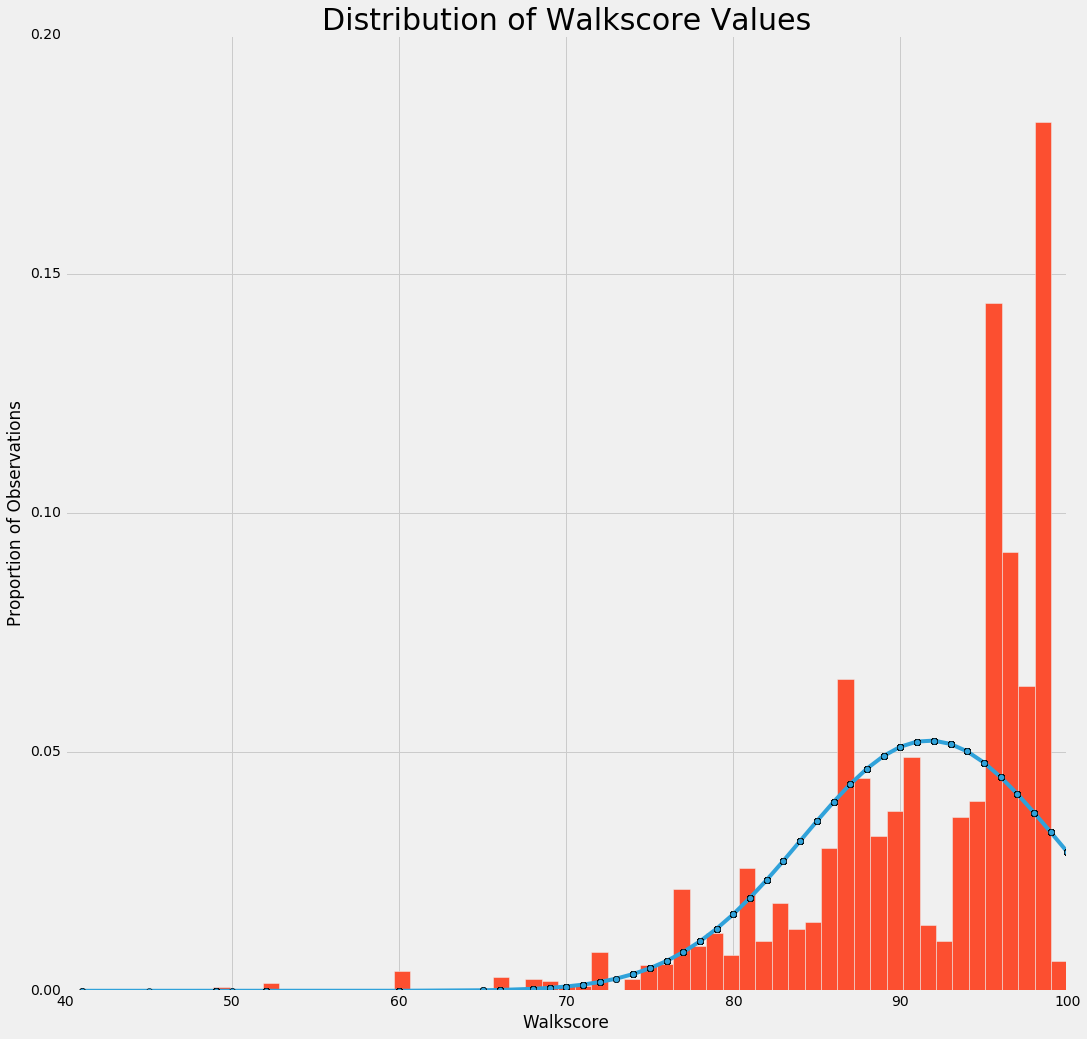

In [107]:
pl.plot(sorted_walkscore, fit,'-o');
pl.hist(data['walkscore'], normed=True, bins = 60);
pl.xlabel('Walkscore');
pl.ylabel('Proportion of Observations');
pl.title('Distribution of Walkscore Values', size = 30);
savefig('swimming.png')

## Classifing walkscore by quintiles

In [49]:
data['walkscore_class'] = np.zeros(len(data['walkscore']))



In [64]:
data['walkscore_class'].ix[data['walkscore'] < 87.000000] = 0
data['walkscore_class'].ix[(data['walkscore'] >= 87.000000) & (data['walkscore'] < 95.000000)] = 1
data['walkscore_class'].ix[(data['walkscore'] >= 95.000000) & (data['walkscore'] < 97.000000)] = 2
data['walkscore_class'].ix[data['walkscore'] > 97.000000] = 3

In [76]:
x_values = data.iloc[:,0:16].values
y_values = data['walkscore_class'].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state=42)

In [83]:
columns = ['road_id', 'road_length', 'record_count', 'mean_SndMean', 'mean_lux', 'mean_acel', 

          'mean_isloud', 'mean_isdark', 'mean_bumps', 'sum_isloud', 'sum_isdark', 'sum_bumps', 

          'rn_mean_SndMean', 'rn_mean_lux', 'rn_mean_acel', 'rn_mean_isloud', 'rn_mean_isdark', 

          'rn_mean_bumps', 'rn_sum_isloud', 'rn_sum_isdark', 'rn_sum_bumps']
predictors_sum = [columns.index('sum_isloud'),columns.index('sum_isdark'),columns.index('sum_bumps')]
predictors_mean = [columns.index('mean_isloud'),columns.index('mean_isdark'),columns.index('mean_bumps')]
predictors_rn = [columns.index('rn_mean_isloud'), columns.index('rn_mean_isdark'), columns.index('rn_mean_bumps')]



In [87]:
data.columns.get_indexer
predictors = [data.columns.get_loc('is_loud'), data.columns.get_loc('is_dark'), data.columns.get_loc('bumpflag')]



In [104]:
len(data[data['lu_code']==0]), len(data[data['lu_code']==1]), len(data[data['lu_code']==2]), len(data[data['lu_code']==3])

(19600, 8866, 937, 697)

In [ ]:
len()

In [90]:
x_predictors_train = x_train[:,predictors]
x_predictors_test = x_test[:,predictors]
#x_predictors_valid = x_valid[:,predictors]


## Kernels

In [91]:
#Linear Kernel
bool_clf = OneVsRestClassifier(svm.SVC(kernel='linear', C=1.0, class_weight='balanced'))
bool_clf.fit(x_predictors_train, y_train)
linear_y_pred = bool_clf.predict(x_predictors_test)
right=1.0*(linear_y_pred==np.asarray(y_test)).sum()/len(y_test)

print "we successfully(OS) predict the {} percent of data using a linear kernel".format((right)*100)
os.system('say "First Linear Done"');

we successfully(OS) predict the 25.6720024162 percent of data using a linear kernel


In [92]:
pd.unique(linear_y_pred)

array([ 3.,  2.,  0.])

In [95]:
rbf_clf = svm.SVC(kernel='rbf',C=1.0) 
rbf_clf.fit(x_predictors_train, y_train)
rbf_clf_foot = rbf_clf.predict(x_predictors_test)

right=1.0*(rbf_clf_foot==np.asarray(y_test)).sum()/len(y_test)

print "we successfully(OS) predict the {} percent of data using a rbf kernel".format((right)*100)

we successfully(OS) predict the 29.7694553509 percent of data using a rbf kernel


In [96]:
pd.unique(rbf_clf_foot)

array([ 0.,  1.])

In [97]:
bool_poly_clf = OneVsRestClassifier(svm.SVC(kernel='poly', C=1.0, class_weight='balanced'))
bool_poly_clf.fit(x_predictors_train, y_train)
poly_y_pred = bool_poly_clf.predict(x_predictors_test)

right=1.0*(poly_y_pred==np.asarray(y_test)).sum()/len(y_test)

print "we successfully(OS) predict the {} percent of data using a poly kernel".format((right)*100)

we successfully(OS) predict the 25.6317326085 percent of data using a poly kernel


In [98]:
pd.unique(poly_y_pred)

array([ 3.,  2.,  0.])